In [1]:
# Import des librairies nécessairespour le bon déoulement du travail
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Affectation du csv dans une variable
data = pd.read_csv("Salary_Data.csv")

In [3]:
# Visualisation des cinq premières ligne du dataset
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# Connaitre les dimensions du dataset
data.shape

(30, 2)

In [5]:
# Vérification des lignes dupliquées
data_duplicated = data.duplicated()
data_duplicated.value_counts()

False    30
dtype: int64

In [6]:
# Vérificaton des lignes nulles
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
# Verifiaction du type des colonnes du dataset
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
# Affichage des statistque de base
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

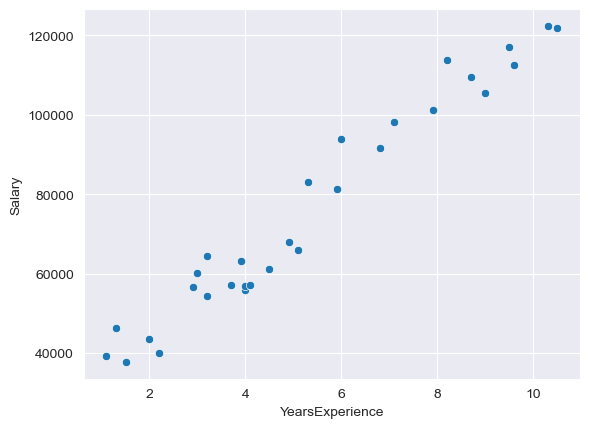

In [9]:
# Visualiser la relation entre les deux variables
sns.scatterplot(x="YearsExperience", y="Salary", data=data)

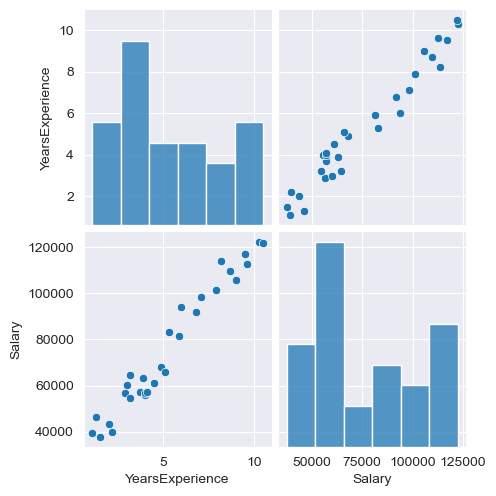

In [10]:
# Visualisation à l'aide du PairPlot, qui permet de faire un visuel d'une colonne en fonction d'une autre
sns.pairplot(data)

In [11]:
# Selection des colonnes de variables indépendantes et la variable dépendantes
X = data[['YearsExperience']]
y = data['Salary']

In [12]:
# Dviiser les données en ensemble de training et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Construisons le modèle de regression multiple en utilisant la bibliothèque scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# afficher la pente et l'interception sur l'axe des y
print(model.coef_)
print(model.intercept_)

[9423.81532303]
25321.583011776813


In [15]:
# trainer le modèle et évaluer les performances
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train MSE: ", mse_train)
print("Train r2: ",r2_train)

Train MSE:  27102249.73126139
Train r2:  0.9645401573418146


In [16]:
# Tester le modèle et évaluer les performances
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test= r2_score(y_test, y_pred_test)
print("Test MSE: ", mse_test)
print("Test r2: ", r2_test)

Test MSE:  49830096.85590839
Test r2:  0.9024461774180497


In [17]:
# Utilisation du modèle pour des prévisions
x_new = np.array([3]).reshape(1, -1)
y_new = model.predict(x_new)
print('Prediction: ',y_new)

Prediction:  [53593.02898087]


C:\Users\ngoue\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
